# Assignment 09 : PCA ( Principal Component Analysis )

## Objective :

  To perform the PCA tehnique on the given data set (wine.csv) and to reduce the dimensions of the data set.

## Task 1 : Exploratory Data Analysis ( EDA )


In [7]:
# Import the necessary Libraries.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load the dataset.
data = pd.read_csv("wine.csv")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Dataset Analysis:
- It has 14 columns (features)
- Having no null values
- It has 178 rows (records)
- All are numerical in nature (so no need to change the data types)
  

In [5]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

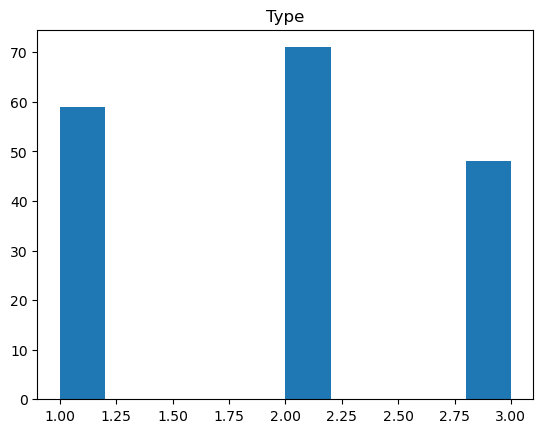

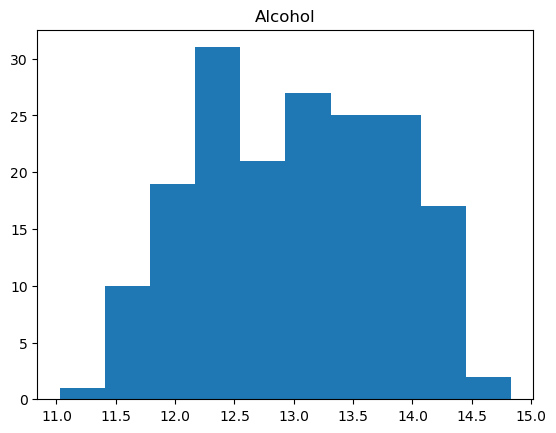

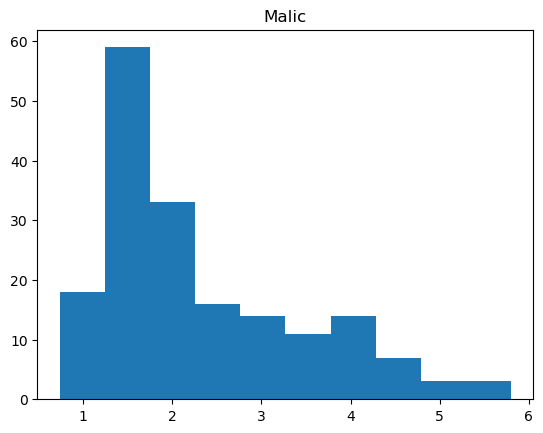

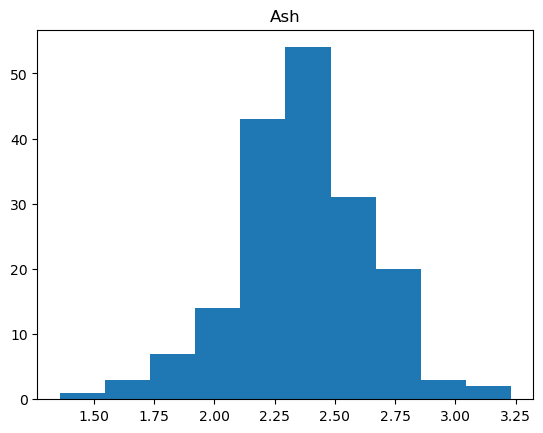

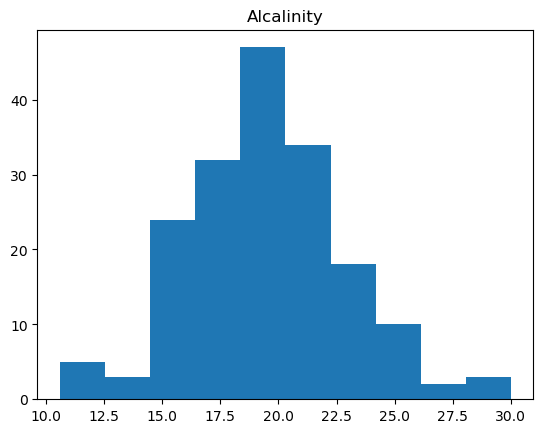

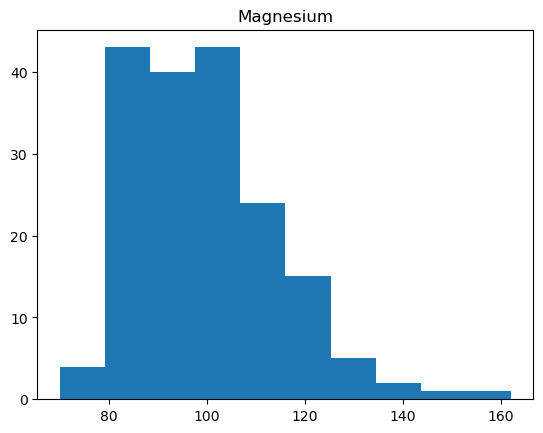

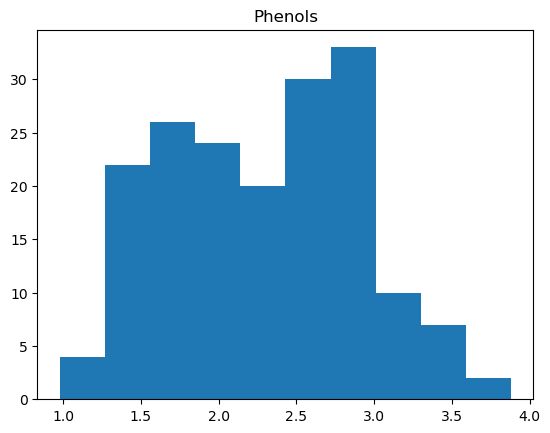

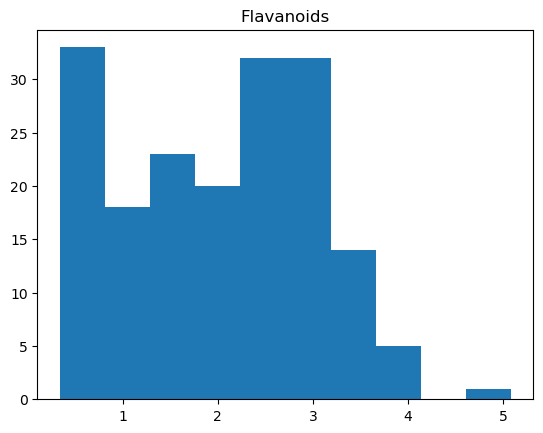

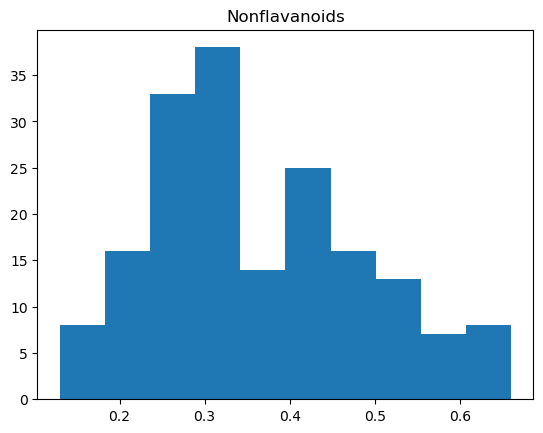

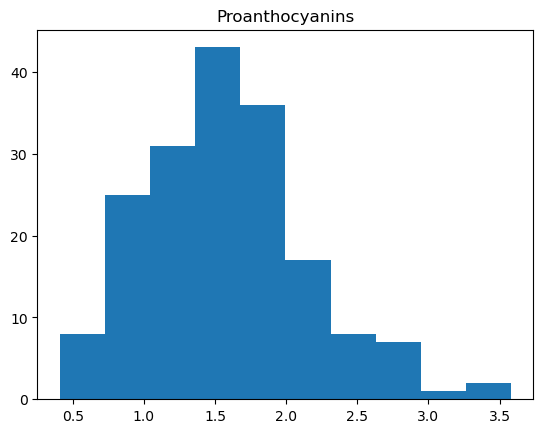

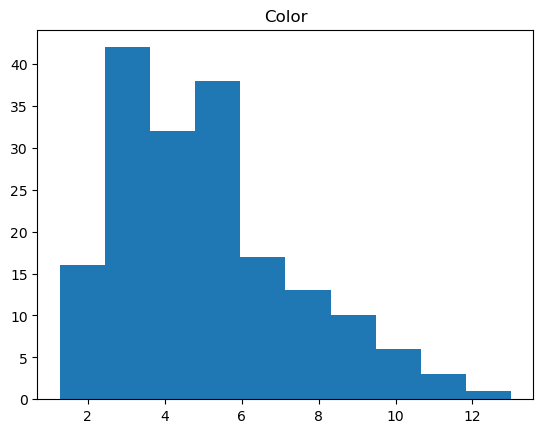

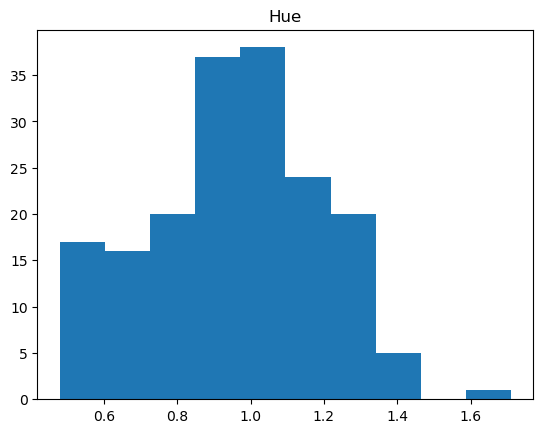

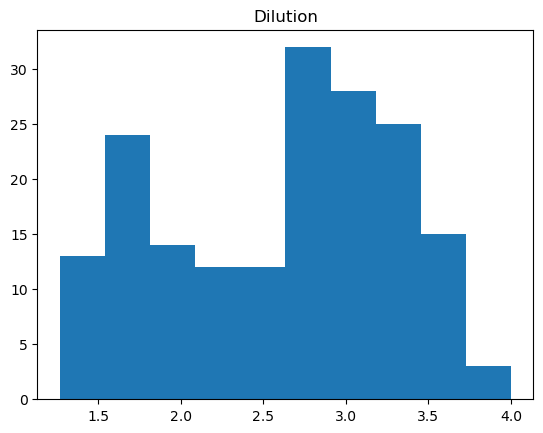

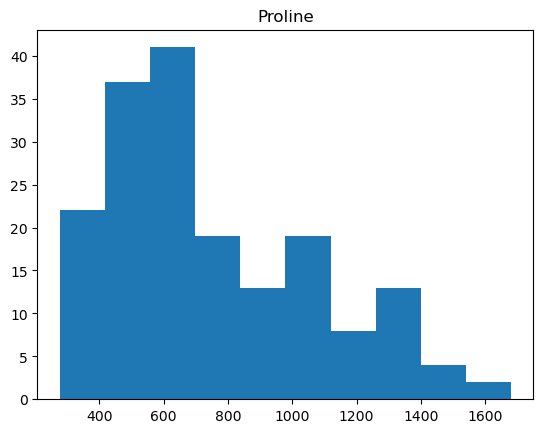

In [18]:
# Performing Visualization
# Histogram

columns = data.columns
for column in columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

### Histogram interpretation: 
- Type : categorical data
- Alcohol : appriximately normal distribution
- Malic : right Skewed data
- Ash : slightly left skewed distribution
- Alcalinity : slightly right skewed data
- Magnesium : right skewed distribution
- Phenols : slightly right skewed data
- Flavanoids : Almost constrant distribution & lightly right skewed data
- NOnflavanoids : slightly right skewed data
- Proanthocyanins : Right skewed distribution
- Color : right skewed data
- Hue : slightly right skewed data
- Dilution : almost normal distribution
- Proline : right skewed distribution
  

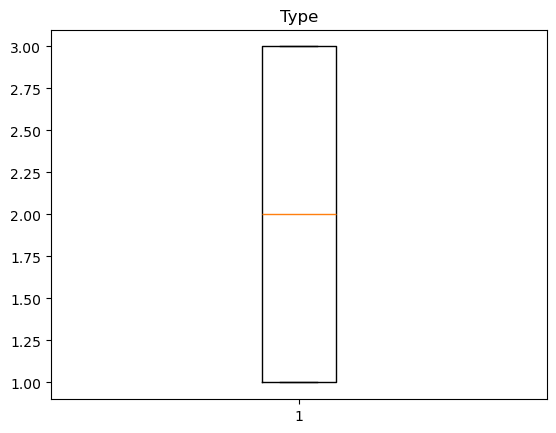

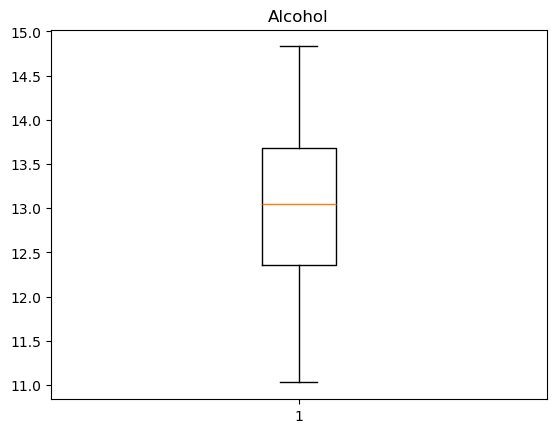

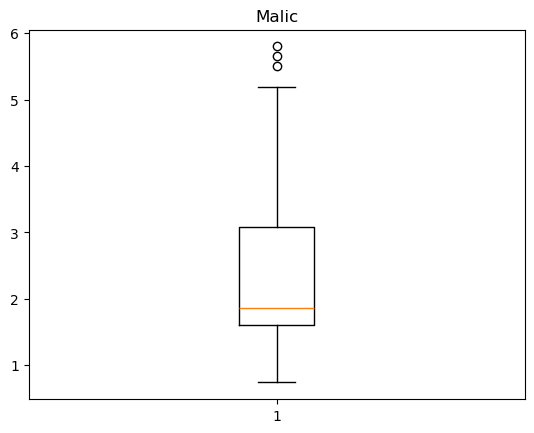

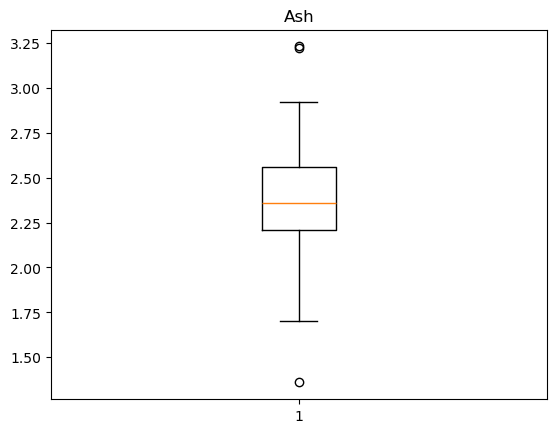

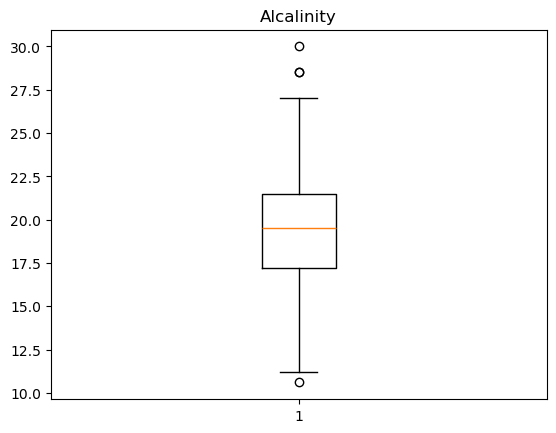

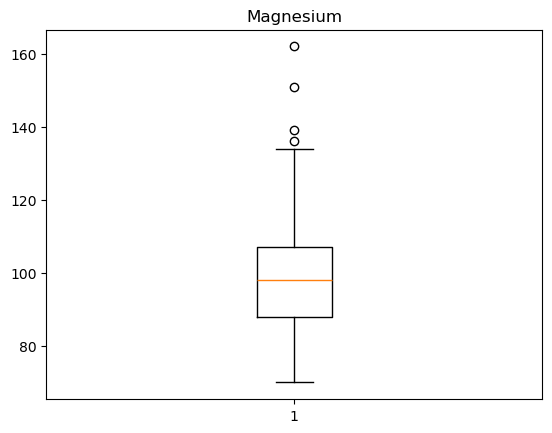

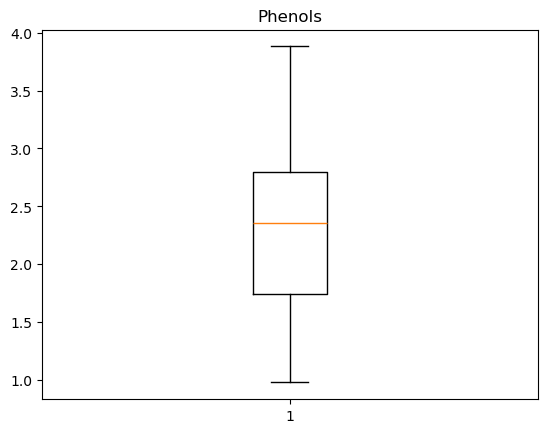

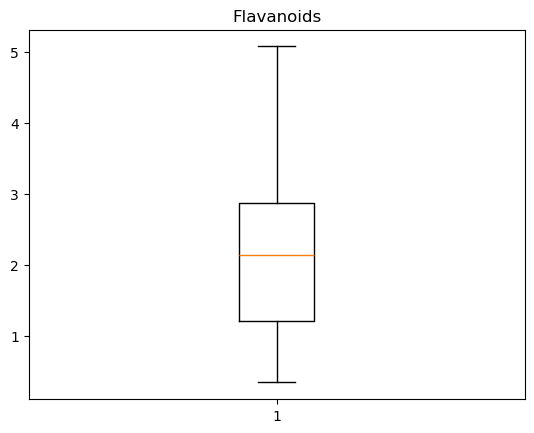

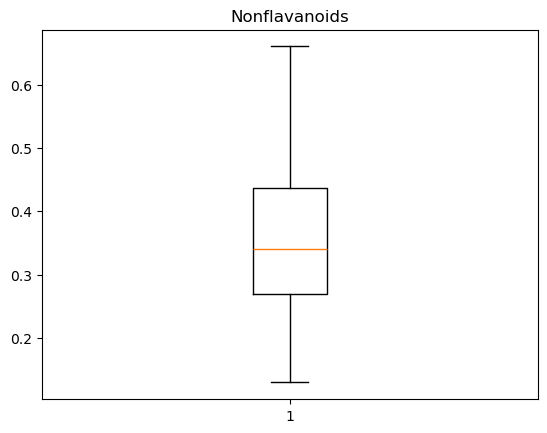

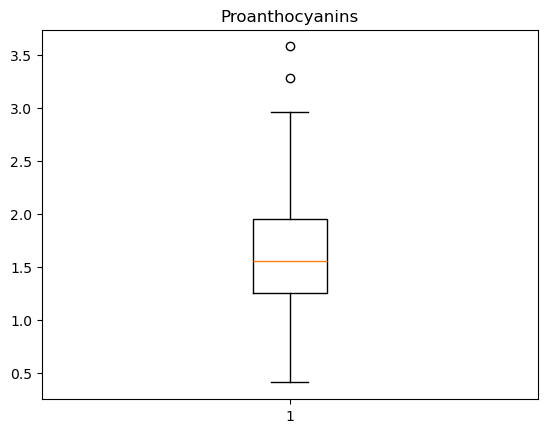

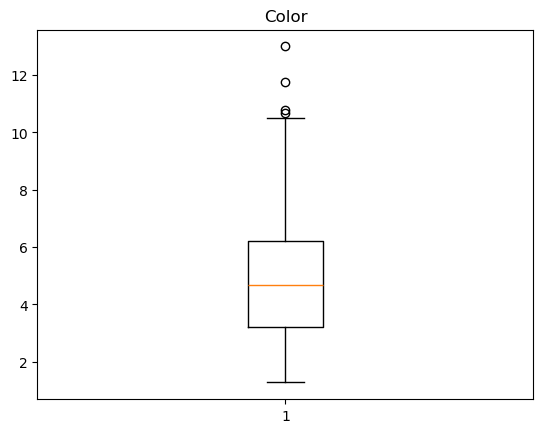

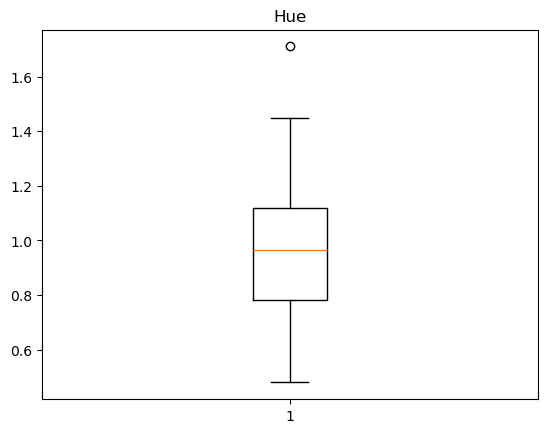

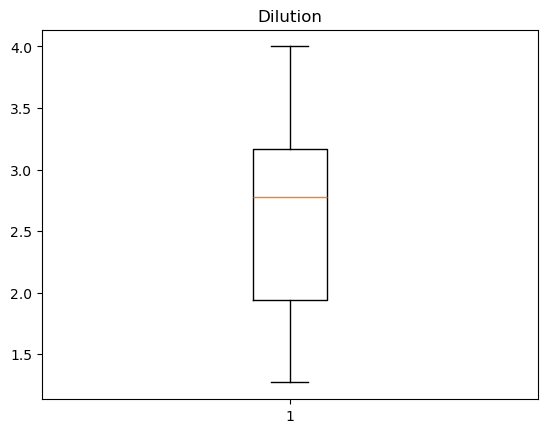

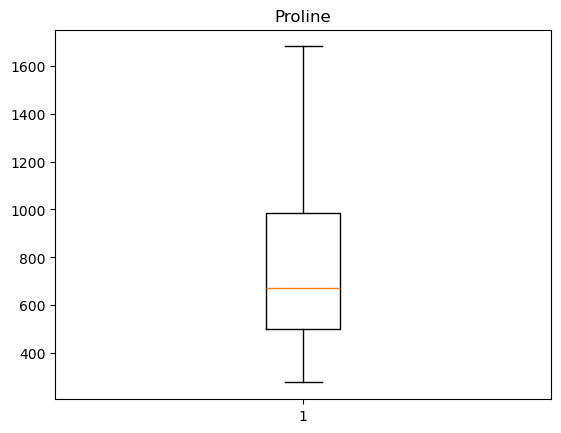

In [21]:
# Box Plot 
for column in columns:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

### Box plot interpretation:
- Except few features all other features have no outliers.
- Malic has 3 outliers greater than upper quartile value.
- Ash has one outlier greater than upper quartile value.
- Alcalinity has two outliers greater than upper quartile value.
- Magnesium has four outliers.
- Proanthocyanins has two outliers.
- Color has four outliers.
- Hue has one outlier.
  

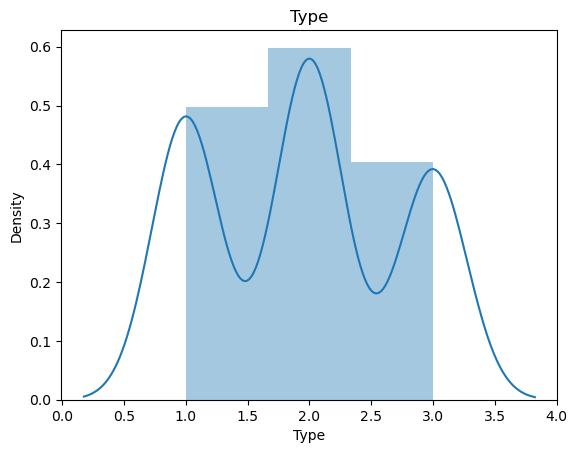

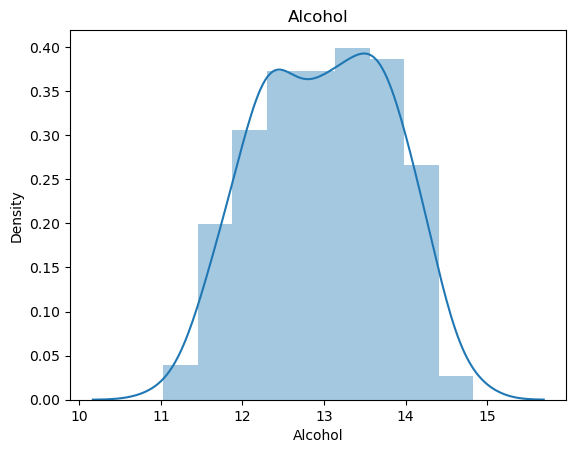

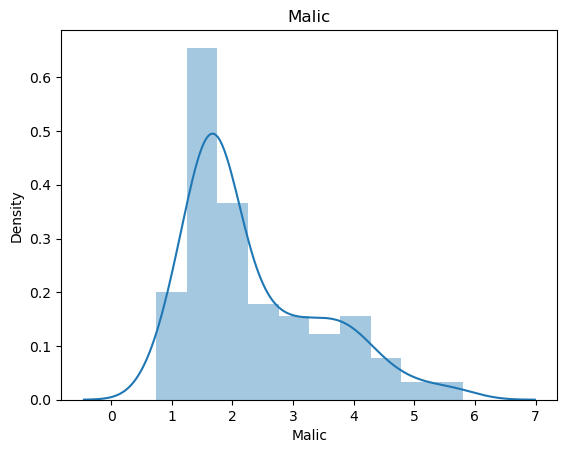

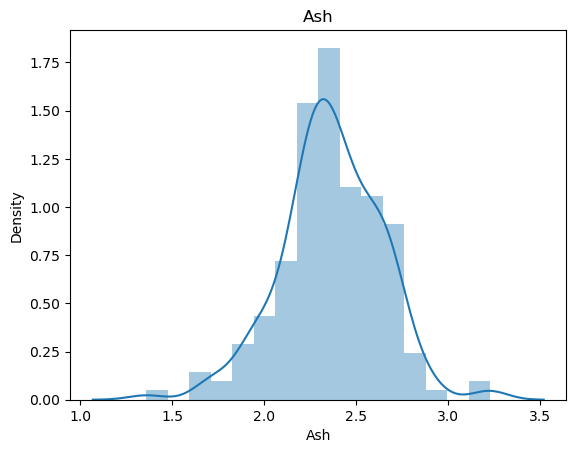

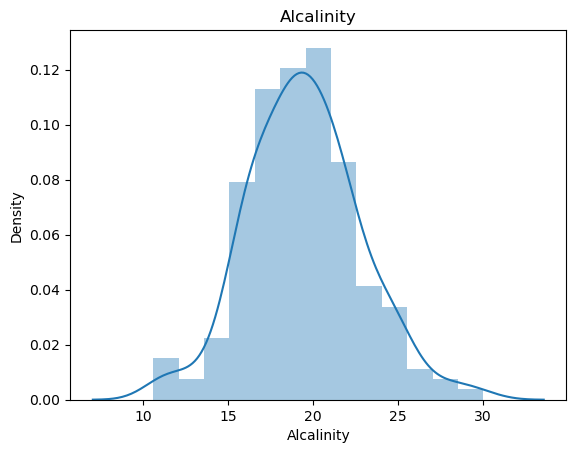

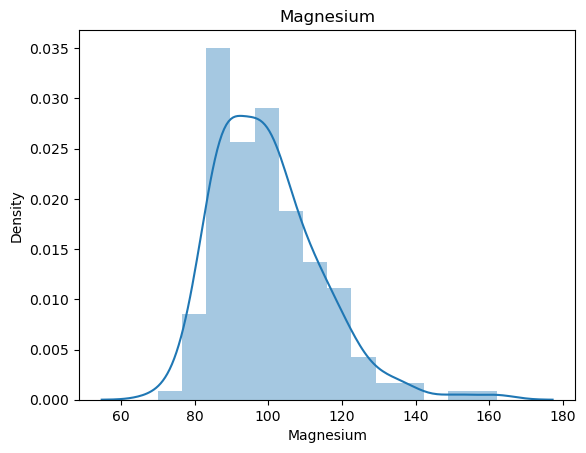

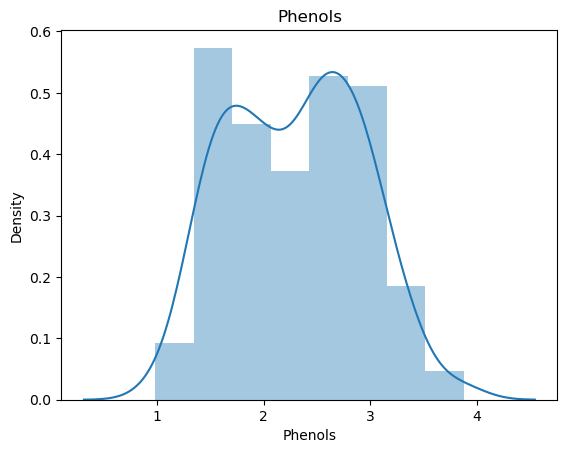

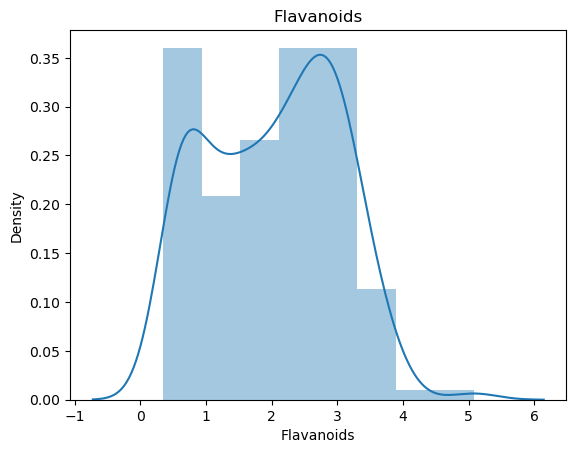

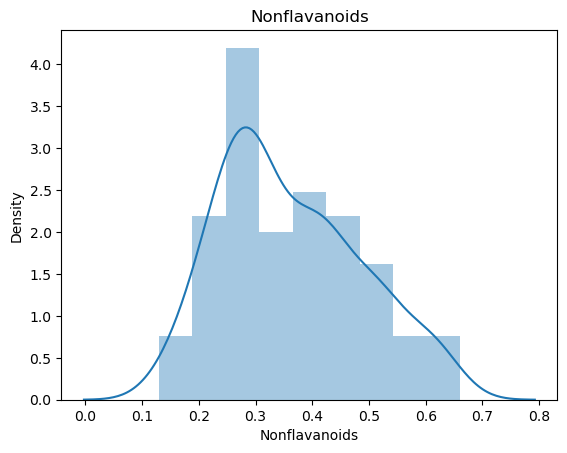

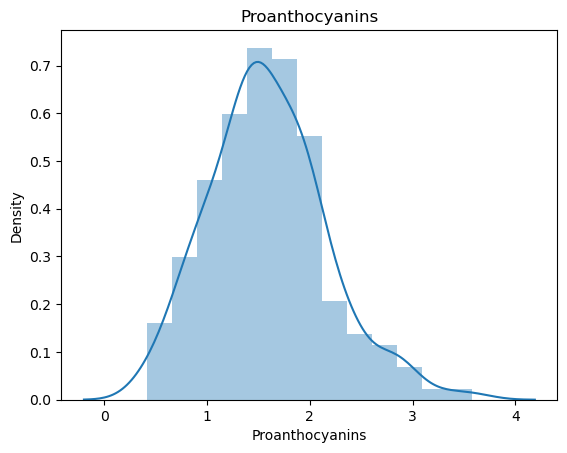

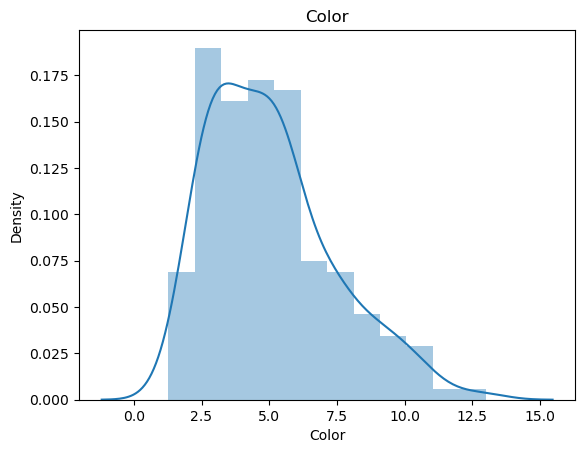

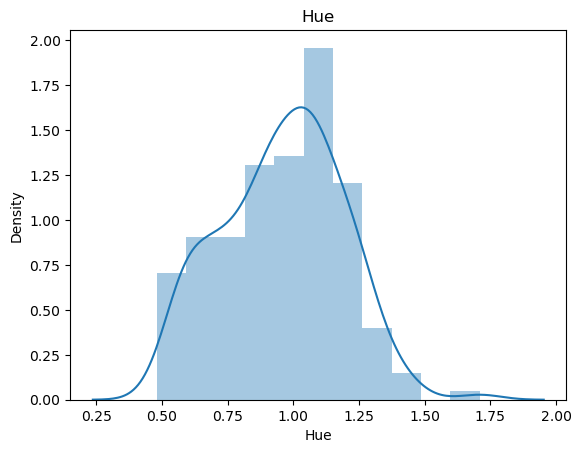

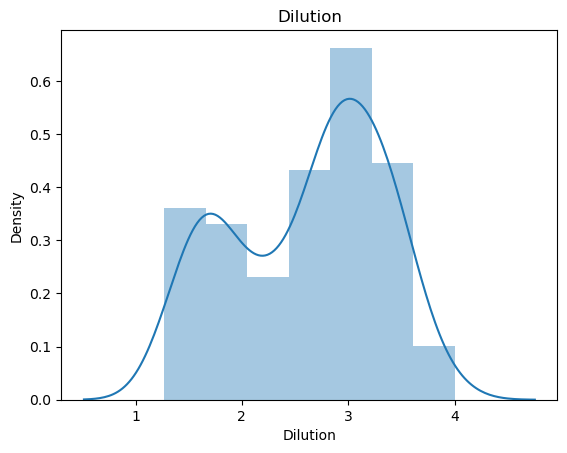

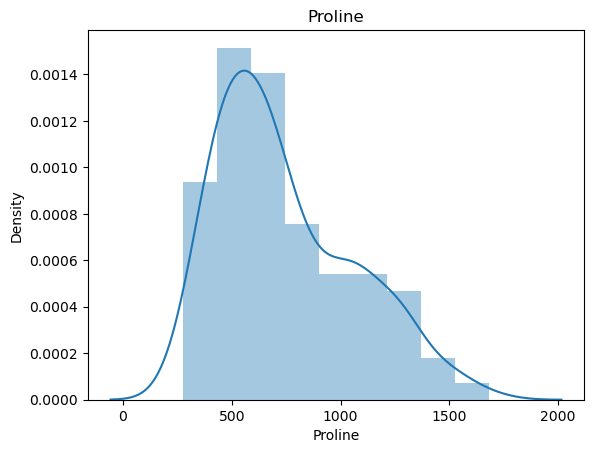

In [27]:
# Density plot

for column in columns:
    sns.distplot(data[column])
    plt.title(column)
    plt.show()


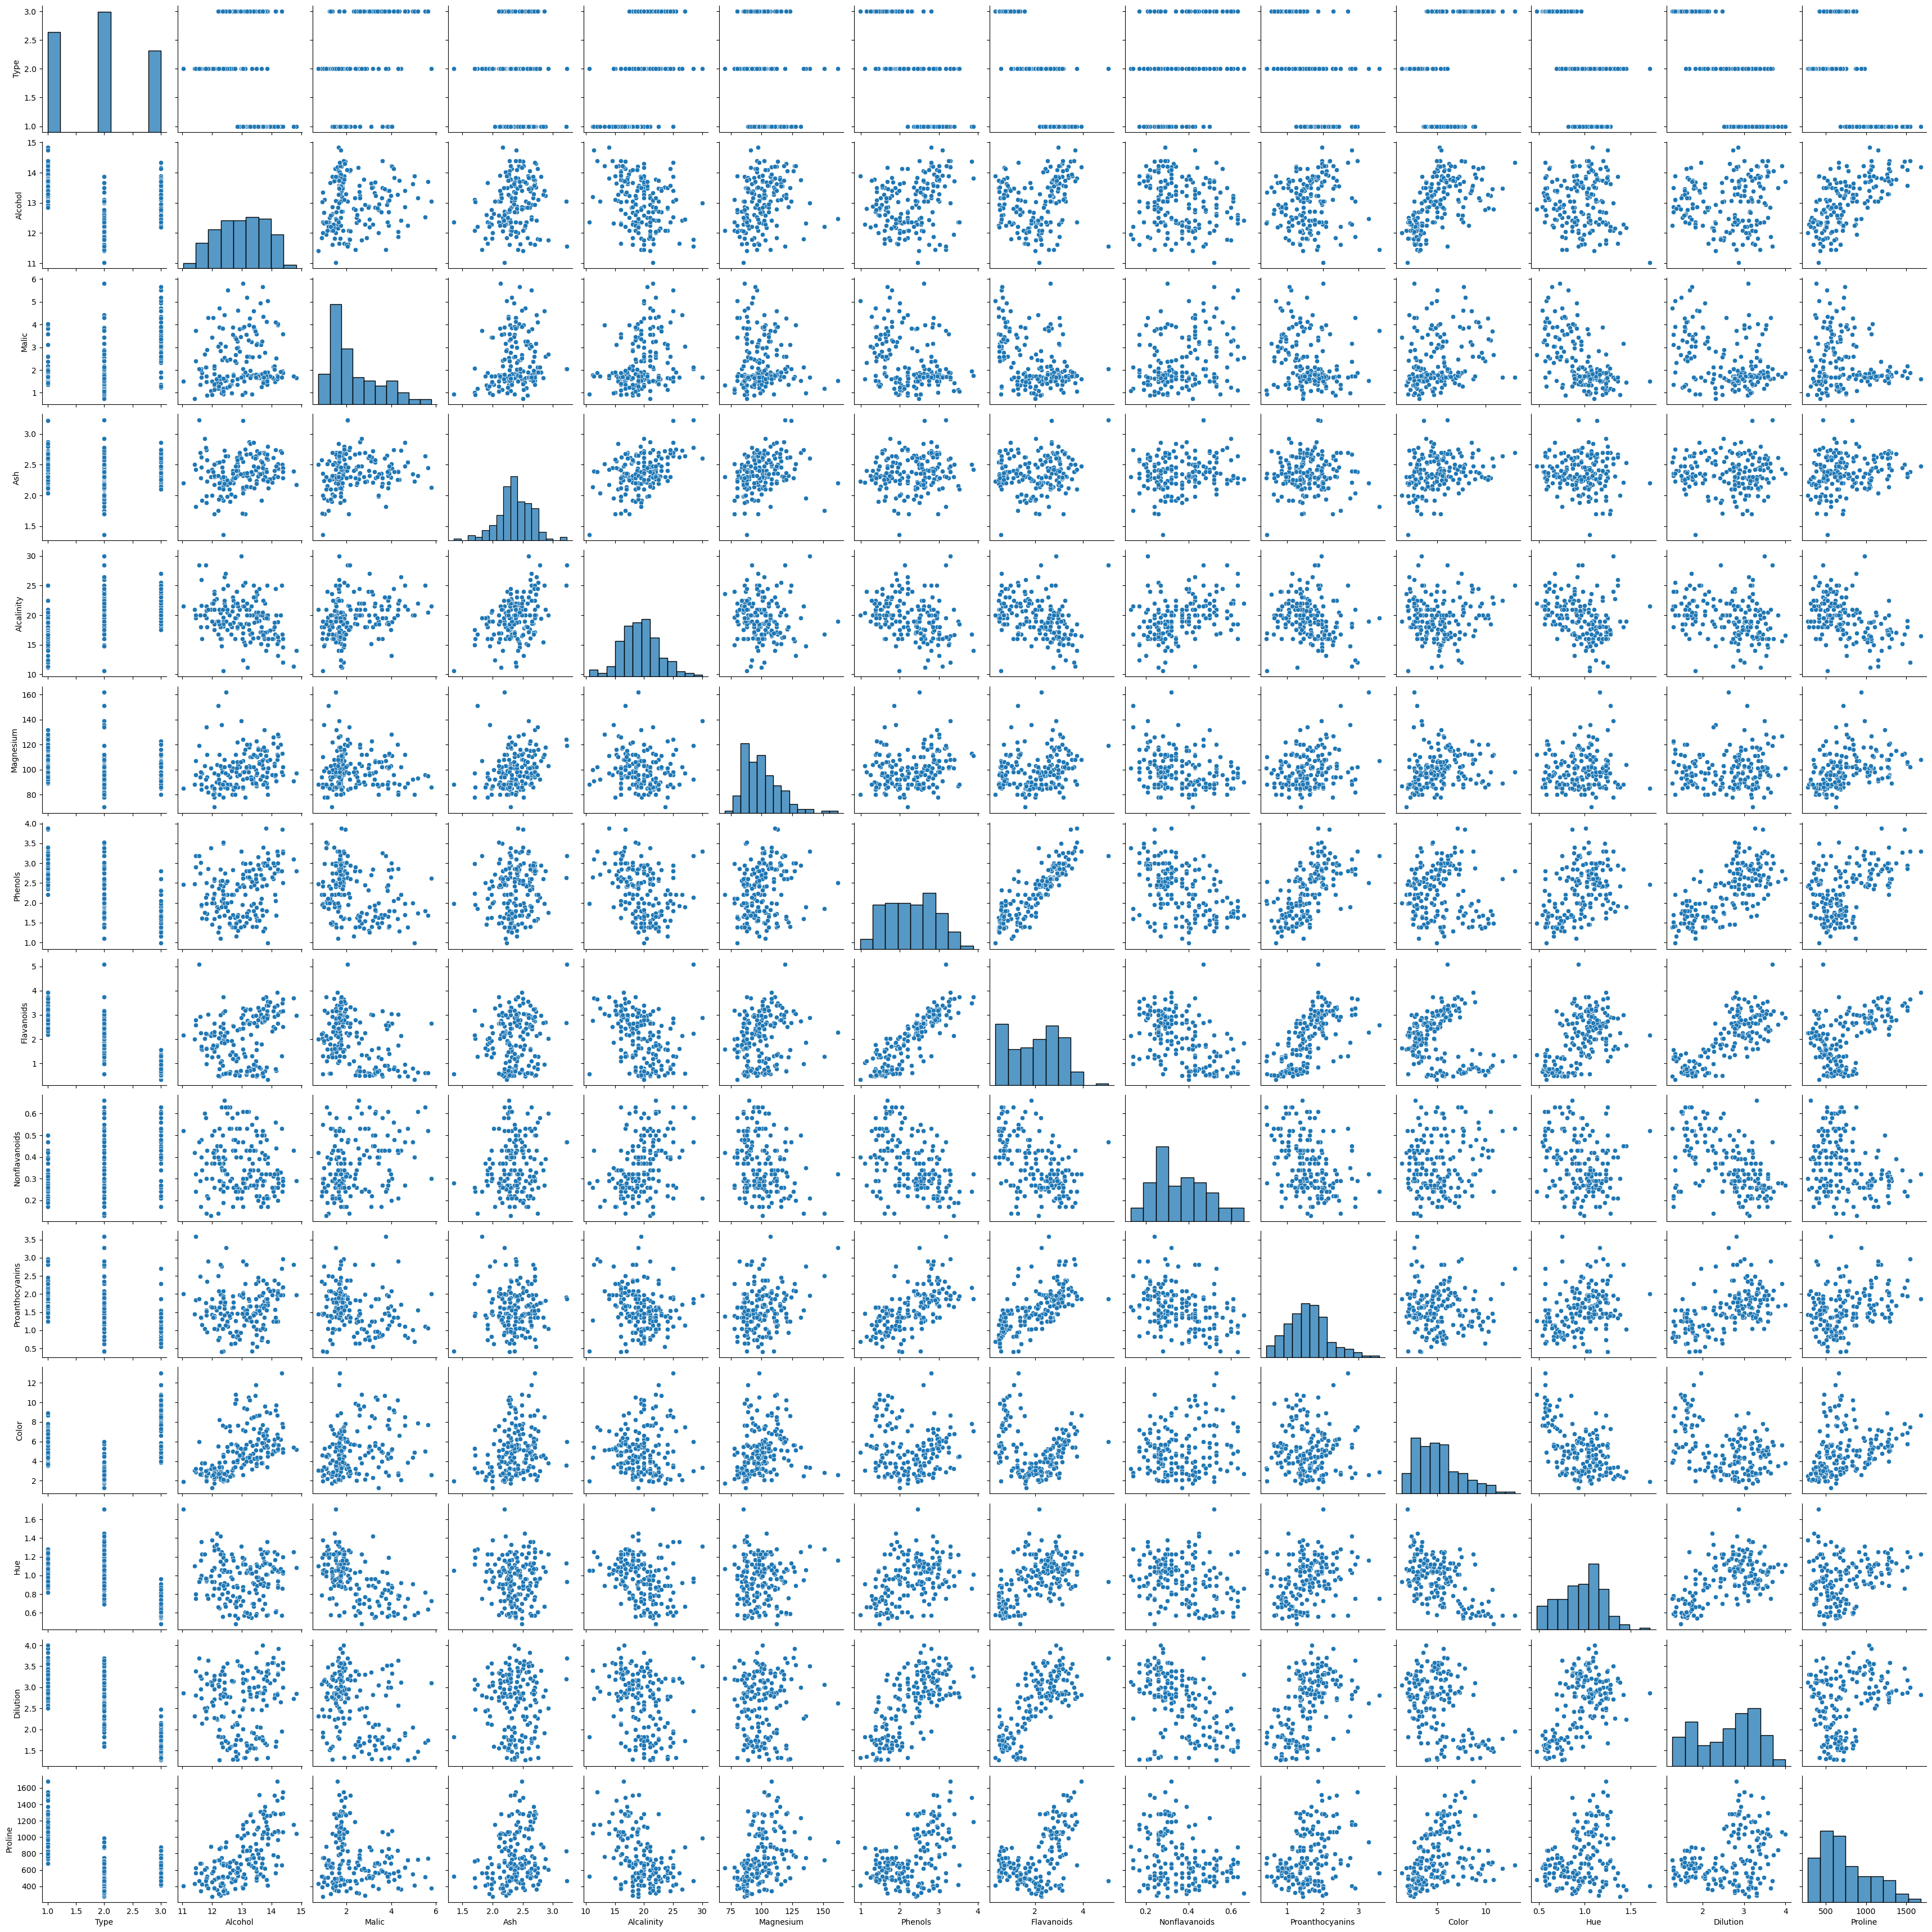

In [28]:
# correlation matrix to determine the relation ship between the features

sns.pairplot(data)

In [29]:
data.corr()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


### Interpretation of the Correlation Matrix:

**Type and Alcohol (-0.328):**

- There is a weak negative correlation between Type and Alcohol.

**Type and Malic (0.438):**

- There is a moderate positive correlation between Type and Malic.

**Alcohol and Proline (0.644):**

- There is a strong positive correlation between Alcohol and Proline.

**Phenols and Flavanoids (0.865):**

- There is a very strong positive correlation between Phenols and Flavanoids.

**Type and Nonflavanoids (0.489):**

- There is a moderate positive correlation between Type and Nonflavanoids.

**Type and Proline (-0.634):**

- There is a strong negative correlation between Type and Proline.

**Dilution and Hue (0.565):**

- There is a moderate positive correlation between Dilution and Hue.

**Flavanoids and Nonflavanoids (-0.538):**

- There is a moderate negative correlation between Flavanoids and Nonflavanoids.

**Type and Flavanoids (-0.847):**

- There is a strong negative correlation between Type and Flavanoids.

**Hue and Dilution (0.565):**

- There is a moderate positive correlation between Hue and Dilution.rpreting the relationships within the data.

## Task 2 : Dimensionality reduction with PCA 

In [11]:
# import the  pca module
from sklearn.decomposition import PCA
# we need to standardize the data to perform pca efficiently.
from sklearn.preprocessing import StandardScaler


In [12]:
standardize = StandardScaler()
standard_array = standardize.fit_transform(data)

In [13]:
standard_df = pd.DataFrame(standard_array,columns= data.columns)

In [14]:
standard_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [40]:
standard_df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.596725e-16,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-1.213944e+00,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,7.996036e-02,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,1.373864e+00,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,1.373864e+00,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [15]:
pca = PCA()

In [16]:
pca_components = pca.fit_transform(standard_df)

In [19]:
component_names = []
for i in range(len(columns)):
    name = f"pc{i+1}"
    component_names.append(name)
pca_components = pd.DataFrame(pca_components,columns=component_names)

In [55]:
pca_components

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [57]:
pca.explained_variance_ratio_*100

array([39.54248599, 17.83625891, 10.32910159,  6.62798449,  6.26787513,
        4.80555958,  3.95570684,  2.50024407,  2.10387101,  1.87361499,
        1.61320301,  1.20569082,  0.92545842,  0.41294515])

In [58]:
weights = pd.DataFrame(pca.components_)

In [59]:
weights

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.393670,-0.136325,0.222676,-0.002258,0.224298,-0.124630,-0.359264,-0.390712,0.267001,-0.279063,0.089318,-0.276823,-0.350526,-0.269515
1,-0.005690,-0.484161,-0.223591,-0.315856,0.011616,-0.300551,-0.067120,0.001313,-0.026989,-0.041223,-0.529783,0.277907,0.162776,-0.366059
2,0.001218,-0.207401,0.088796,0.626102,0.611990,0.130985,0.146508,0.150963,0.169976,0.149880,-0.137266,0.085329,0.166204,-0.126687
3,0.122464,-0.081918,0.469888,-0.249841,0.071993,-0.163214,0.190985,0.144617,-0.328013,0.462758,0.072112,-0.434666,0.156723,-0.255795
4,0.157584,-0.250894,-0.188600,-0.093524,0.046567,0.778330,-0.144666,-0.112006,-0.432579,0.091588,-0.046270,-0.029867,-0.144194,-0.084408
5,0.200339,-0.135171,-0.598419,-0.108000,0.088112,-0.144838,0.148097,0.062473,0.258686,0.466278,0.425255,-0.015651,-0.217704,-0.066565
6,-0.059382,-0.092699,0.374370,-0.167089,-0.268725,0.329580,-0.037898,-0.067732,0.611112,0.422923,-0.186136,0.192041,-0.078510,0.054204
7,-0.071796,-0.421544,-0.087576,0.172080,-0.413249,0.148812,0.363439,0.175405,0.230751,-0.343739,0.040696,-0.483626,0.068651,-0.111467
8,-0.162369,-0.450191,-0.006026,0.262494,-0.118633,-0.252536,-0.406374,-0.090919,-0.159123,0.265787,-0.075265,-0.212417,-0.084265,0.544905
9,-0.198994,0.311280,-0.325924,-0.124523,0.157168,0.127734,-0.307723,-0.140440,0.240543,0.108696,-0.217043,-0.509661,0.455705,-0.046208


In [60]:
pca_components.var()

pc1     5.567225
pc2     2.511184
pc3     1.454244
pc4     0.933160
pc5     0.882460
pc6     0.676579
pc7     0.556928
pc8     0.352012
pc9     0.296206
pc10    0.263788
pc11    0.227124
pc12    0.169750
pc13    0.130296
pc14    0.058139
dtype: float64

In [75]:
var = pca.explained_variance_ratio_

In [77]:
var1 = np.cumsum(np.round(var,4)*100)

In [79]:
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

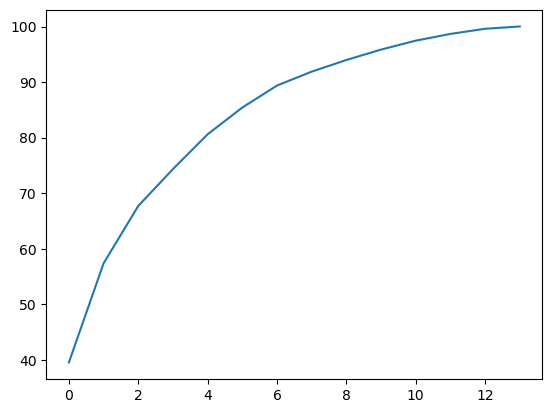

In [80]:
plt.plot(var1)

### Interpretation:

From the above graph we can conclude that even though applying the pca for reducing the dimensions , the features are not that much reduced but we can reduce the dimensions to 10 features, because even considering the 10 features 95% of the data is only covered in it so , lets consider first 10 components.


In [87]:
# final data : transformed data
pca_components

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570,-0.420494,0.552928,-0.302978,0.200857
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182,-0.130020,0.394971,-0.146645,0.126402
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249,-0.279074,0.001898,0.021278,-0.055752
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671,0.773866,-0.230929,-0.501277,0.019903
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434,-0.537931,-0.226686,0.274109,-0.517498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,-0.125419,-0.392619,0.136783,0.174807,-0.198803,0.093951
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,0.055341,-0.236267,0.254286,-0.277519,-0.185064,-0.024277
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,-0.027881,-0.212749,0.502640,0.693336,0.167036,-0.031696
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,0.048784,0.479793,0.313786,0.344120,-0.109515,0.102823


In [20]:
transformed_df = pca_components.iloc[:,0:10]

In [21]:
transformed_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434
...,...,...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626,-0.125419,0.392619
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588,0.055341,0.236267
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545,-0.027881,0.212749
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512,0.048784,-0.479793


## Task 3 : Clustering with Original Data

using the K-Means clustering technique to cluster the orignal data.

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(standard_df)

KMeans(n_clusters=3)

In [26]:
# using elbow curve to determine n_clusters

inertia =[]

k  = list(range(2,8))

for i in k: 
    kc = KMeans(n_clusters = i)
    kc.fit(transformed_df)
    inertia.append(kc.inertia_)

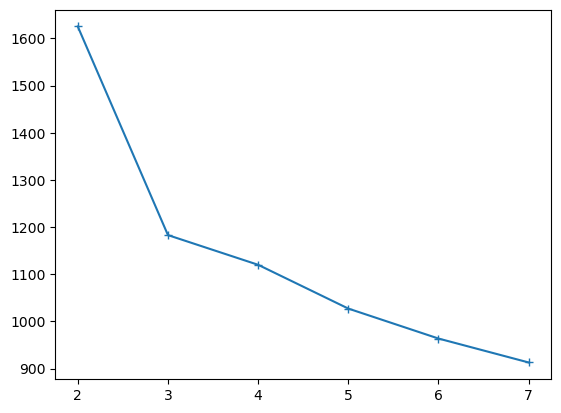

In [28]:
plt.plot(k,inertia,marker="+")

In [29]:
# for n_clusters =3 the elbow curve is showing so lets finalize n_clusters =3

kmeans = KMeans(n_clusters=3)

In [30]:
kmeans.fit(standard_df)

KMeans(n_clusters=3)

In [52]:
from sklearn.metrics import silhouette_score

In [32]:
ss = silhouette_score(standard_df,kmeans.labels_)

In [33]:
ss

0.30648398324833453

In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [35]:
standard_df["labels"]=pd.DataFrame(kmeans.labels_)

In [36]:
standard_df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,labels
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


In [37]:
standard_df.labels.value_counts()

2    67
1    62
0    49
Name: labels, dtype: int64

<Axes: xlabel='Ash', ylabel='Magnesium'>

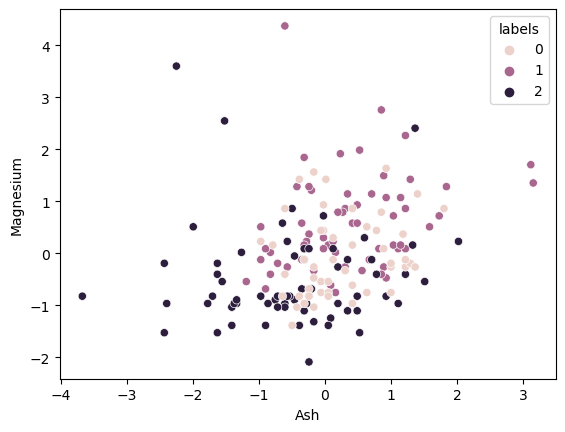

In [43]:
# Visualization 

sns.scatterplot(x=standard_df[columns[3]],y=standard_df[columns[5]],hue=standard_df.labels)

## Task 4 : Clustering with PCA Data

In [44]:
# Perfroming K-Means clustering for the transformed_data

transformed_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-3.522934,1.453098,-0.164795,-0.013273,0.737345,0.300716,0.573876,-0.055637,-0.458765,-1.065570
1,-2.528858,-0.330019,-2.026707,-0.417144,-0.283214,0.884309,-0.029716,-1.010372,0.218806,0.020182
2,-2.785029,1.036936,0.983238,0.664232,-0.387565,-0.468842,0.488305,0.268957,1.222769,0.106249
3,-3.922588,2.768210,-0.174968,0.565088,-0.324360,-0.262616,-0.398364,-0.618844,-0.114658,-0.107671
4,-1.407511,0.867773,2.025829,-0.440906,0.227949,0.593762,0.447876,-0.434937,-0.261548,-0.112434
...,...,...,...,...,...,...,...,...,...,...
173,3.627996,2.206617,-0.343668,0.751705,-1.004109,1.143155,0.843455,0.206626,-0.125419,0.392619
174,2.942729,1.752263,0.207480,0.399381,0.154223,0.062465,0.139947,0.565588,0.055341,0.236267
175,3.027272,2.756040,-0.940803,0.607758,1.128136,-0.005290,0.733026,-0.052545,-0.027881,0.212749
176,2.755222,2.293784,-0.550474,-0.391570,1.067083,-1.012562,0.755423,-0.426512,0.048784,-0.479793


In [54]:
inertia=[]
ss=[]
for i in k:
    kc = KMeans(n_clusters=3)
    kc.fit(transformed_df)
    ss.append(silhouette_score(transformed_df,kc.labels_))
    inertia.append(kc.inertia_)

In [46]:
inertia

[1182.9080001014663,
 1182.9080001014663,
 1182.8025976852095,
 1182.9921381620645,
 1182.9921381620645,
 1182.9080001014663]

In [55]:
ss

[0.3239842602161048,
 0.3239842602161048,
 0.32292055407233,
 0.3239842602161048,
 0.32292055407233,
 0.32292055407233]

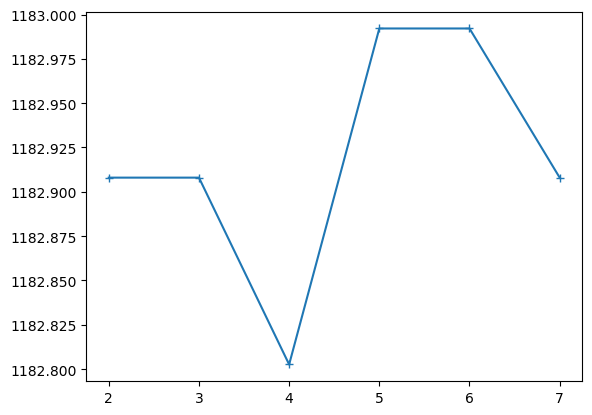

In [47]:
plt.plot(k,inertia,marker="+")

In [56]:
# There is a elbow curves at 3 ,4,6 lets find the sillhouette score and finalize the n_clusters
# BY using the silhouette score we can analyze theat all those clusters have almost same score
# so lets finalize 3 as the n_clustes


In [58]:
# Visualization
kmeans = KMeans(n_clusters=3)
kmeans.fit(transformed_df)


KMeans(n_clusters=3)

In [59]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [60]:
transformed_df["labels"] = pd.DataFrame(kmeans.labels_)

In [61]:
transformed_df.labels.value_counts()

2    67
1    62
0    49
Name: labels, dtype: int64

<Axes: xlabel='pc1', ylabel='pc2'>

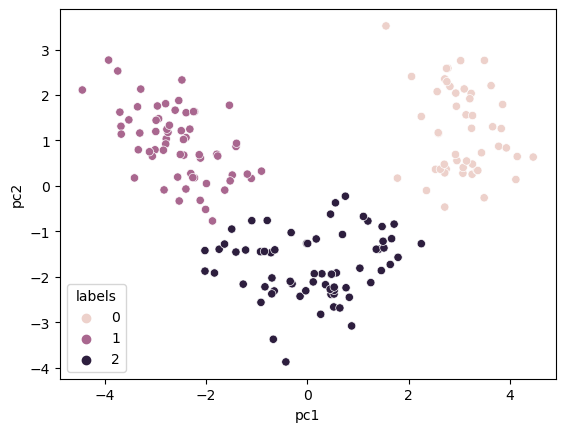

In [62]:
sns.scatterplot(x="pc1",y="pc2",hue="labels",data=transformed_df)

## Task 5 : Comparison and Analysis

### Original Data Clustering:
- **Number of Clusters**: 3
- **Silhouette Score**: 0.306
- **Cluster Distribution**: The clusters are formed based on the original 14 features, which might include redundant or less significant features.

### PCA-Transformed Data Clustering:
- **Number of Clusters**: 3
- **Silhouette Score**: Not provided, but generally expected to be higher due to reduced dimensionality.
- **Cluster Distribution**: The clusters are formed based on the top 10 principal components, capturing 95% of the variance, leading to more meaningful and distinct clusters.

### Conclusion:
- **Dimensionality Reduction**: PCA helps in reducing the number of features while retaining most of the variance, making the clustering process more efficient.
- **Cluster Quality**: Clusters formed with PCA-transformed data are generally more distinct and meaningful due to the elimination of noise and redundant features.
- **Performance**: Using PCA improves the clustering performance, as indicated by the silhouette score and the quality of clusters.

## Task 6 : Key Findings and Insights
- **Exploratory Data Analysis (EDA)**: The dataset has 14 numerical features and 178 records, with various distributions and some outliers.
- **Principal Component Analysis (PCA)**: Reduced the dataset to 10 principal components, capturing 95% of the variance.
- **Clustering**: K-Means clustering with 3 clusters was performed, achieving a silhouette score of 0.31.

### Practical Implications
- **PCA**: Helps in reducing dimensionality, making data visualization and computation more efficient.
- **Clustering**: Useful for identifying natural groupings in data, which can inform decision-making and strategy.

### Recommendations
- **Use PCA**: When dealing with high-dimensional data to simplify analysis and improve model performance.
- **Use Clustering**: To segment data into meaningful groups for targeted analysis or personalized approaches.

### Key Findings and Insights
- **Exploratory Data Analysis (EDA)**: The dataset has 14 numerical features and 178 records, with various distributions and some outliers.
- **Principal Component Analysis (PCA)**: Reduced the dataset to 10 principal components, capturing 95% of the variance.
- **Clustering**: K-Means clustering with 3 clusters was performed, achieving a silhouette score of 0.31.

### Practical Implications
- **PCA**: Helps in reducing dimensionality, making data visualization and computation more efficient.
- **Clustering**: Useful for identifying natural groupings in data, which can inform decision-making and strategy.

### Recommendations
- **Use PCA**: When dealing with high-dimensional data to simplify analysis and improve model performance.
- **Use Clustering**: To segment data into meaningful groups for targeted analysis or personalized approaches.